In [1]:
import pandas as pd

# Load your data
trip_data = pd.read_excel('../data/Data_MNL_all.xlsx')  # Replace with your file path

# Check the frequency distribution of location_code
location_code_distribution = trip_data['location_code'].value_counts()

In [2]:
# Assuming you have the location_code_distribution from the previous step
location_code_distribution_df = location_code_distribution.reset_index()
location_code_distribution_df.columns = ['location_code', 'count']

location_code_distribution_df

,location_code,count
0,40,1955
1,39,1265
2,94,1137
3,93,1053
4,5,934
...,...,...
145,148,4
146,89,4
147,76,3
148,151,2


In [3]:
# Example: Saving DataFrame to a text file
location_code_distribution_df.to_csv('location_code_distribution.txt', index=False)

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming trip_data is your DataFrame and excluding non-numeric columns
X = trip_data.select_dtypes(include=[np.number])
X = X.dropna()  # Drop rows with NaNs for VIF calculation

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                       Feature        VIF
0             beh_peta_potensi   5.525204
1                  sosdem_usia  21.172638
2            sosdem_anggota_rt  10.906431
3   sosdem_penghasilan_pribadi   6.475052
4          beh_rata_jam_online  37.208745
5              beh_lama_driver  10.118902
6             loc_jumlah_pasar   3.720732
7           loc_jumlah_sekolah   8.919298
8                loc_jumlah_pt   3.306289
9             loc_jumlah_halte   4.180277
10          loc_jumlah_stasiun   1.251107
11         loc_jumlah_terminal   2.865404
12            loc_jumlah_hotel   5.633892
13             loc_jumlah_mall   4.060536
14              loc_jumlah_ofm  24.274184
15           loc_jumlah_pickup  20.167950
16                loc_populasi  19.602594
17        loc_jml_b_permukiman  12.660772
18            loc_jumlah_taman   6.072568
19           loc_jumlah_kantor   7.834148
20               jumlah_faskes   9.790870
21               location_code   6.305463


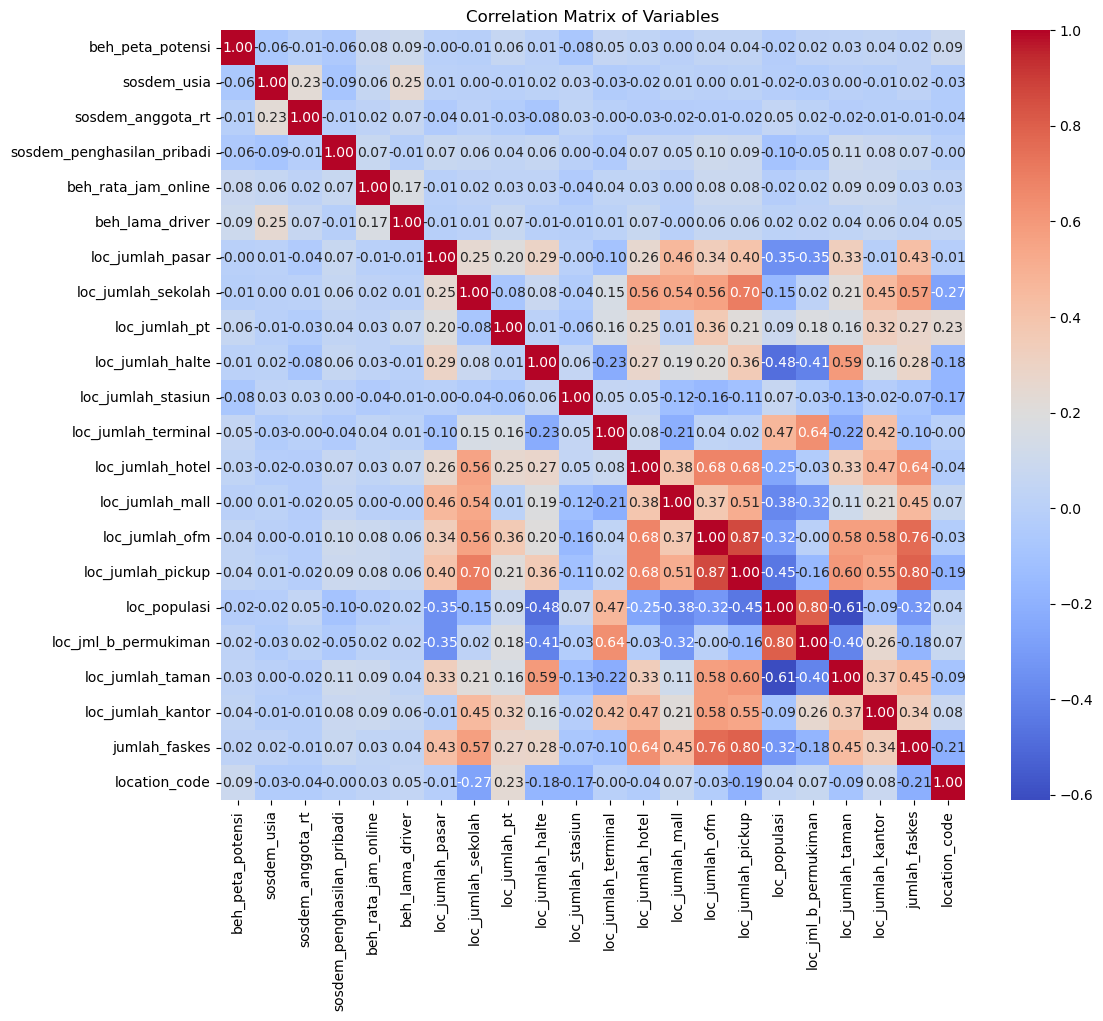

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming trip_data is your DataFrame

# Selecting numeric columns for correlation analysis
numeric_data = trip_data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Variables")
plt.show()

In [5]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['beh_lama_driver', 
                       'loc_jumlah_pickup', 
                       'location_code', 
                       'beh_rata_jam_online', 
                       'sosdem_anggota_rt', 
                       'loc_populasi',
                       'loc_jumlah_ofm']  # Replace with actual variables to remove
trip_data_updated = trip_data.drop(columns=variables_to_remove)

# Recalculate VIF
X = trip_data_updated.select_dtypes(include=[np.number])
X = X.dropna()  # Drop rows with NaNs for VIF calculation

vif_data_updated = pd.DataFrame()
vif_data_updated['Feature'] = X.columns
vif_data_updated['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data_updated)

                       Feature       VIF
0             beh_peta_potensi  4.678298
1                  sosdem_usia  9.216650
2   sosdem_penghasilan_pribadi  5.481327
3             loc_jumlah_pasar  3.608718
4           loc_jumlah_sekolah  6.859290
5                loc_jumlah_pt  3.116469
6             loc_jumlah_halte  3.488321
7           loc_jumlah_stasiun  1.201006
8          loc_jumlah_terminal  2.647603
9             loc_jumlah_hotel  4.854692
10             loc_jumlah_mall  3.622049
11        loc_jml_b_permukiman  5.395274
12            loc_jumlah_taman  4.448917
13           loc_jumlah_kantor  7.087614
14               jumlah_faskes  6.398285


In [14]:
# Assuming 'trip_data' is your DataFrame and 'variables_to_remove' is the list of variables from Lasso
variables_to_remove = ['beh_lama_driver', 
                       'loc_jumlah_pickup',
                       'beh_rata_jam_online', 
                       'sosdem_anggota_rt', 
                       'loc_populasi',
                       'loc_jumlah_ofm']  # Replace with actual variables to remove
trip_data_updated = trip_data.drop(columns=variables_to_remove)

In [15]:
from sklearn.model_selection import train_test_split

X = trip_data_updated.drop(['driver_id','location_code'], axis=1)  # Features
y = trip_data_updated['location_code']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Choose a threshold for minimum number of samples per class
# This threshold is just an example, and should be adjusted based on specific needs
threshold = 50  # For instance, any class with less than 50 samples will be removed

# Identify classes below the threshold
small_classes = y_train.value_counts()[y_train.value_counts() < threshold]
small_classes_list = small_classes.index.tolist()

# Filter out these classes from the dataset
filtered_data = trip_data[~trip_data['location_code'].isin(small_classes_list)]

# Show the impact of this filtering
original_shape = trip_data.shape
filtered_shape = filtered_data.shape
removed_classes_count = len(small_classes_list)

original_shape, filtered_shape, removed_classes_count

((24416, 27), (22892, 27), 60)

In [17]:
from imblearn.over_sampling import SMOTE
# Split the filtered dataset into training and test sets
X_filtered = filtered_data.drop(['driver_id','location_code'], axis=1)
y_filtered = filtered_data['location_code']

# Encoding binary variables in the filtered dataset
X_filtered['beh_platform'] = X_filtered['beh_platform'].astype(int)
X_filtered['trip_jenis_pesanan_Food'] = X_filtered['trip_jenis_pesanan_Food'].astype(int)
X_filtered['trip_jenis_pesanan_Kurir Barang'] = X_filtered['trip_jenis_pesanan_Kurir Barang'].astype(int)
X_filtered['trip_jenis_pesanan_Ride'] = X_filtered['trip_jenis_pesanan_Ride'].astype(int)

# Split the dataset
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered, y_train_filtered)

# Check the new class distribution
new_distribution_filtered = y_train_smote.value_counts()

new_distribution_filtered.head(), new_distribution_filtered.tail()  # Display the head and tail of the new distribution

(location_code
 128    1565
 72     1565
 130    1565
 47     1565
 127    1565
 Name: count, dtype: int64,
 location_code
 143    1565
 27     1565
 135    1565
 84     1565
 115    1565
 Name: count, dtype: int64)

In [26]:
new_distribution_filtered

location_code
128    1565
72     1565
130    1565
47     1565
127    1565
       ... 
143    1565
27     1565
135    1565
84     1565
115    1565
Name: count, Length: 90, dtype: int64

In [27]:
X_train_smote

,beh_peta_potensi,sosdem_usia,sosdem_anggota_rt,sosdem_penghasilan_pribadi,beh_platform,beh_rata_jam_online,beh_lama_driver,loc_jumlah_pasar,loc_jumlah_sekolah,loc_jumlah_pt,...,loc_jumlah_ofm,loc_jumlah_pickup,loc_populasi,loc_jml_b_permukiman,loc_jumlah_taman,loc_jumlah_kantor,trip_jenis_pesanan_Food,trip_jenis_pesanan_Kurir Barang,trip_jenis_pesanan_Ride,jumlah_faskes
0,4,28,4,3499999.5,0,7,6,1,23,0,...,32,699,8344,438,1,7,1,0,0,1
1,5,45,4,2499999.5,1,11,4,1,32,1,...,163,1972,2255,829,3,18,1,0,0,6
2,1,44,4,2499999.5,0,9,4,0,4,2,...,25,193,23071,2461,0,5,0,1,0,1
3,4,44,6,1499999.5,0,11,8,1,1,3,...,100,1153,11028,1105,2,5,1,0,0,4
4,2,27,2,4499999.5,0,11,4,1,23,0,...,32,699,8344,438,1,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140845,3,41,4,2499999.5,0,11,4,0,9,2,...,79,447,11063,1104,3,12,0,0,1,0
140846,1,40,4,3499999.5,0,11,4,0,9,2,...,79,447,11063,1104,3,12,0,0,0,0
140847,5,34,4,6499999.5,0,11,6,0,9,2,...,79,447,11063,1104,3,12,0,0,1,0
140848,4,27,6,4499999.5,1,9,8,0,9,2,...,79,447,11063,1104,3,12,1,0,0,0


In [18]:
import statsmodels.api as sm

# Assuming X_train_smote and y_train_smote are your training data after applying SMOTE
X_train_sm = sm.add_constant(X_train_smote)  # Adding a constant for the intercept
model = sm.MNLogit(y_train_smote, X_train_sm)
result = model.fit()

# Model summary
print(result.summary())

/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3025: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/superapp-research/anaconda3/envs/suapp/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:3026: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:          location_code   No. Observations:               140850
Model:                        MNLogit   Df Residuals:                   138536
Method:                           MLE   Df Model:                         2225
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                     nan
Time:                        19:18:29   Log-Likelihood:                    nan
converged:                       True   LL-Null:                   -6.3380e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                location_code=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                                  nan        nan        nan       